### Importing libraries

In [5]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
from scipy import stats
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('data.csv.zip')

In [7]:
df.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [23]:
df.isnull().sum()

Row ID                              0
Year                                0
Department Title                    0
Payroll Department                  0
Record Number                       0
Job_title                           0
Employment Type                     0
Hourly or Event Rate                0
Annual_sal                          0
Q1 Payments                         0
Q2 Payments                         0
Q3 Payments                         0
Q4 Payments                         0
Payments Over Base Pay              0
% Over Base Pay                     0
Total Payments                      0
Base_Pay                            0
Permanent Bonus Pay                 0
Longevity Bonus Pay                 0
Temporary Bonus Pay                 0
Lump Sum Pay                        0
Overtime Pay                        0
Other Pay & Adjustments             0
Other Pay (Payroll Explorer)        0
MOU                                 0
MOU Title                           0
FMS Departme

In [8]:
df = df[pd.notnull(df['Payroll Department'])]
df.rename(columns={'Projected Annual Salary' : 'Annual_sal'}, inplace = True)
df.rename(columns={'Job Class Title' : 'Job_title'}, inplace = True)
df.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)

In [9]:
for i in ['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    df[i] = df[i].str.replace('$','')

In [10]:
df = df[df.Annual_sal != 0]  
df = df[df.Base_Pay != 0]
df.Annual_sal = df.Annual_sal.astype(float)
df.Base_Pay = df.Base_Pay.astype(float)

### Data Visualisation

<AxesSubplot:xlabel='Annual_sal', ylabel='Density'>

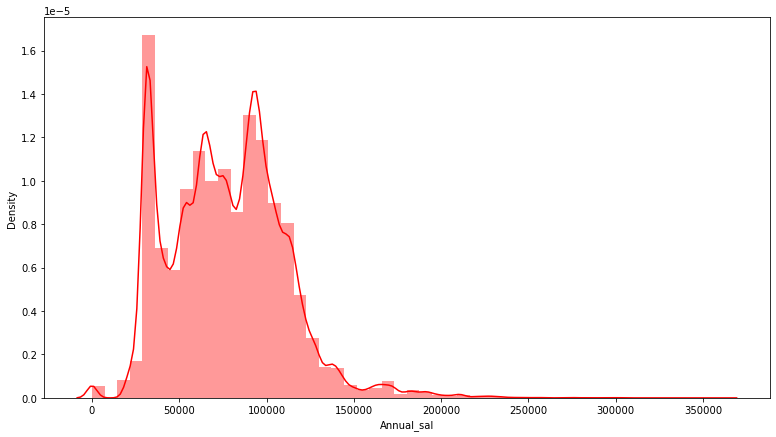

In [36]:
plt.figure(figsize = (13,7))
sns.distplot(df.Annual_sal,color = 'red')

In [25]:
payroll_2015 = df[df.Year ==2015]
payroll_2016 = df[df.Year ==2016]

In [27]:

pop_mean_2015 = payroll_2015['Annual_sal'].mean()
pop_std_2015 = statistics.stdev(payroll_2015.Annual_sal)
print("Population Mean: "+str(pop_mean_2015))
print("Population Standard Deviation: "+str(pop_std_2015))

Population Mean: 76046.39152505301
Population Standard Deviation: 34232.25489729045


In [15]:
print("Population Mean: "+str(payroll_2016['Annual_sal'].mean()))
payroll_2016_sample = payroll_2016.sample(frac=0.10)
sample_mean_2016 = payroll_2016_sample['Annual_sal'].mean()
print("Sample Mean: "+str(sample_mean_2016))
sample_std_2016 = statistics.stdev(payroll_2016_sample.Annual_sal)
print("Sample Standard Deviation: "+str(sample_std_2016))

Population Mean: 78711.19987225177
Sample Mean: 79001.37880183216
Sample Standard Deviation: 33414.92670795291


### Hypothesis testing

In [16]:
import math
zscore_critical = 1.65  
zscore_test_stat = ((sample_mean_2016 - pop_mean_2015)*math.sqrt(8916))/sample_std_2016
print(zscore_test_stat)

8.350262578290288


In [17]:
pop_mean_2016 = payroll_2016['Annual_sal'].mean()
pop_std_2016 = statistics.stdev(payroll_2016.Annual_sal)

zscore_error = ((pop_mean_2016 - pop_mean_2015)/pop_std_2016)
print(zscore_error)

0.07937359898019851


In [20]:
payroll_2015_elec = payroll_2015[payroll_2015.Job_title == 'Electrician']
payroll_2016_elec = payroll_2016[payroll_2016.Job_title == 'Electrician']
sample_elec_2015 = payroll_2015_elec.sample(frac=0.41)
sample_elec_mean_2015 = sample_elec_2015['Base_Pay'].mean()
print("Sample Mean 2015 "+str(sample_elec_mean_2015))
sample_elec_2016 = payroll_2016_elec.sample(frac=0.22)
sample_elec_mean_2016 = sample_elec_2016['Base_Pay'].mean()
print("Sample_Mean_2016= "+str(sample_elec_mean_2016))
sam_1 = sample_elec_2015.Base_Pay
sam_2 = sample_elec_2016.Base_Pay

Sample Mean 2015 71200.51457142855
Sample_Mean_2016= 32983.777714285716


In [31]:
f, p = stats.f_oneway(sam_1, sam_2)
print ('F value:', f)
print ('P value:', p, '\n')

F value: 70.12840066229944
P value: 4.582882374586954e-12 

